In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import data

In [3]:
df = pd.read_csv("stroke_data.csv", sep=",",index_col="id")

In [4]:
df.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1


In [5]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
df.loc[df.bmi.isna(),:]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0


In [8]:
df.loc[df.bmi.isna(),:].describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,201.000000,201.000000,201.000000,201.000000,0.0,201.000000
mean,52.049154,0.233831,0.164179,126.724627,NaN,0.199005
std,22.276181,0.424323,0.371363,59.240322,NaN,0.400249
min,0.480000,0.000000,0.000000,57.520000,NaN,0.000000
25%,37.000000,0.000000,0.000000,81.430000,NaN,0.000000
50%,58.000000,0.000000,0.000000,99.870000,NaN,0.000000
75%,71.000000,0.000000,0.000000,191.790000,NaN,0.000000
max,82.000000,1.000000,1.000000,260.850000,NaN,1.000000


In [9]:
df = df.drop(index=df.loc[df.bmi.isna(),:].index)

In [10]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [11]:
raw_df=df.copy()

In [12]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [13]:
df1 = df

In [14]:
df1.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

<Axes: xlabel='gender', ylabel='Count'>

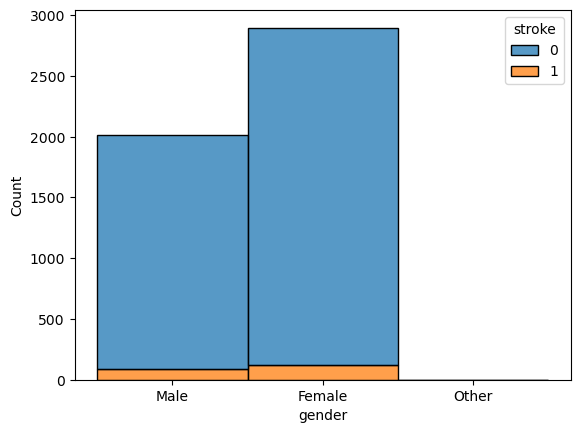

In [15]:
sns.histplot(x="gender",hue="stroke",multiple="stack",data=df1)

In [16]:
df1.gender.value_counts()

gender
Female    2897
Male      2011
Other        1
Name: count, dtype: int64

In [17]:
df1= df1.drop(df1[df1['gender']=='Other'].index)

In [18]:
df1.gender.value_counts()

gender
Female    2897
Male      2011
Name: count, dtype: int64

In [19]:
df1.groupby('gender')['stroke'].mean()

gender
Female    0.041422
Male      0.044257
Name: stroke, dtype: float64

<Axes: xlabel='age', ylabel='Count'>

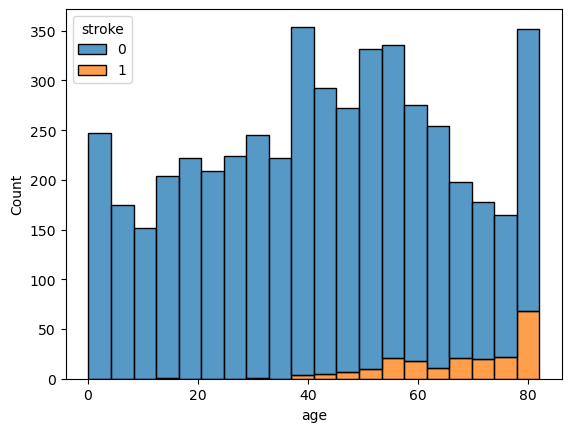

In [20]:
sns.histplot(x="age",hue="stroke",multiple="stack",data=df1)

In [21]:
df1.groupby('stroke')['age'].mean()

stroke
0    41.763805
1    67.712919
Name: age, dtype: float64

<Axes: xlabel='hypertension', ylabel='Count'>

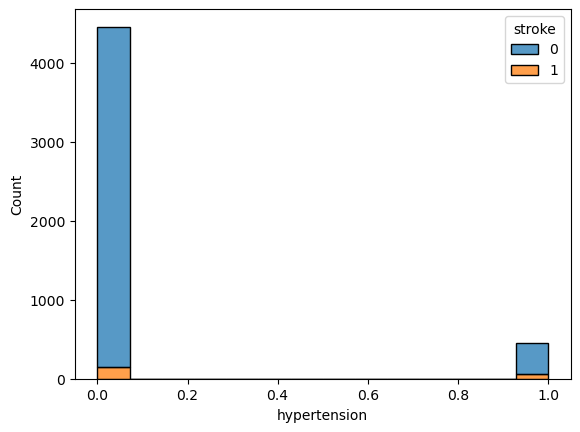

In [22]:
sns.histplot(x="hypertension",hue="stroke",multiple="stack",data=df1)

In [23]:
df1.hypertension.value_counts()

hypertension
0    4457
1     451
Name: count, dtype: int64

In [24]:
df1.hypertension.mean()

0.09189079054604726

In [25]:
df1.groupby('hypertension')['stroke'].mean()

hypertension
0    0.033431
1    0.133038
Name: stroke, dtype: float64

<Axes: xlabel='heart_disease', ylabel='Count'>

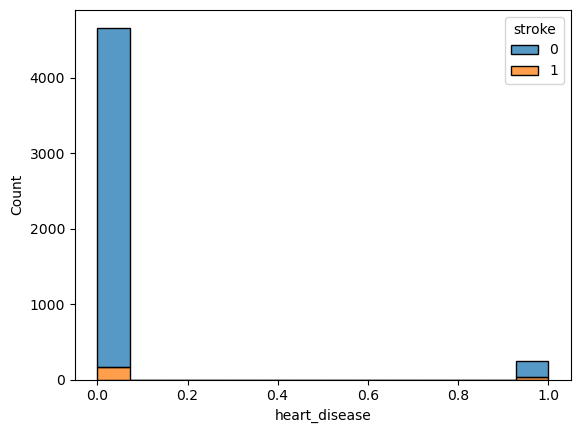

In [26]:
sns.histplot(x="heart_disease",hue="stroke",multiple="stack",data=df1)

In [27]:
df1.heart_disease.value_counts()

heart_disease
0    4665
1     243
Name: count, dtype: int64

In [28]:
df1.groupby('heart_disease')['stroke'].mean()

heart_disease
0    0.036227
1    0.164609
Name: stroke, dtype: float64

<Axes: xlabel='ever_married', ylabel='Count'>

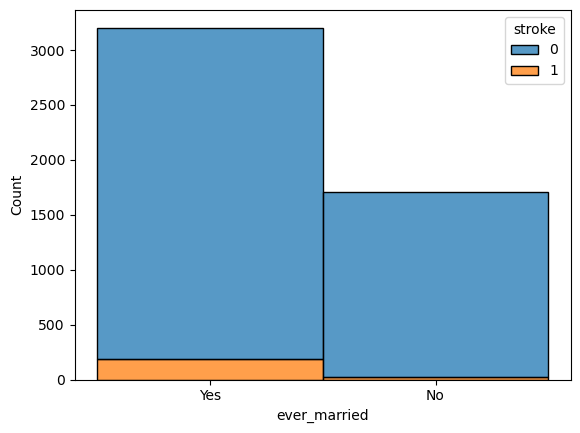

In [29]:
sns.histplot(x="ever_married",hue="stroke",multiple="stack",data=df1)

In [30]:
df1.groupby('ever_married')['stroke'].mean()

ever_married
No     0.013498
Yes    0.058052
Name: stroke, dtype: float64

<Axes: xlabel='work_type', ylabel='Count'>

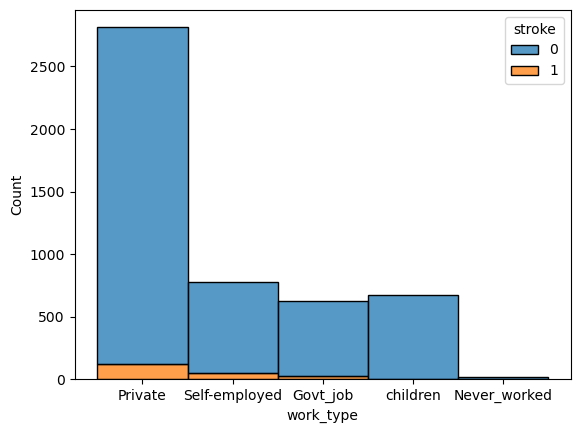

In [31]:
sns.histplot(x="work_type",hue="stroke",multiple="stack",data=df1)

In [32]:
df1.work_type.value_counts()

work_type
Private          2810
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: count, dtype: int64

In [33]:
df1.groupby('work_type')['stroke'].mean()

work_type
Govt_job         0.044444
Never_worked     0.000000
Private          0.045196
Self-employed    0.068387
children         0.001490
Name: stroke, dtype: float64

In [34]:
df1 = df1.drop('work_type', axis=1)

<Axes: xlabel='Residence_type', ylabel='Count'>

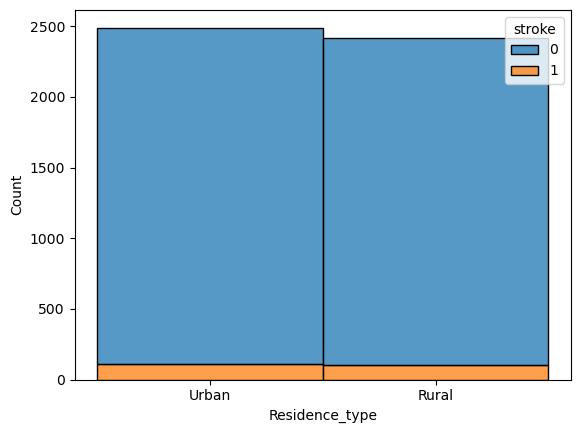

In [35]:
sns.histplot(x="Residence_type",hue="stroke",multiple="stack",data=df1)

In [36]:
df1.groupby('Residence_type')['stroke'].mean()

Residence_type
Rural    0.041356
Urban    0.043775
Name: stroke, dtype: float64

In [37]:
df1 = df1.drop('Residence_type', axis=1)

<Axes: xlabel='avg_glucose_level', ylabel='Count'>

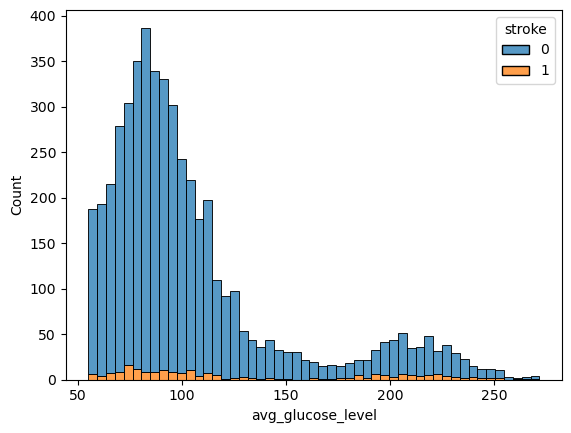

In [38]:
sns.histplot(x="avg_glucose_level",hue="stroke",multiple="stack",data=df1)

In [39]:
df1.groupby('stroke')['avg_glucose_level'].mean()

stroke
0    103.995367
1    134.571388
Name: avg_glucose_level, dtype: float64

<Axes: xlabel='bmi', ylabel='Count'>

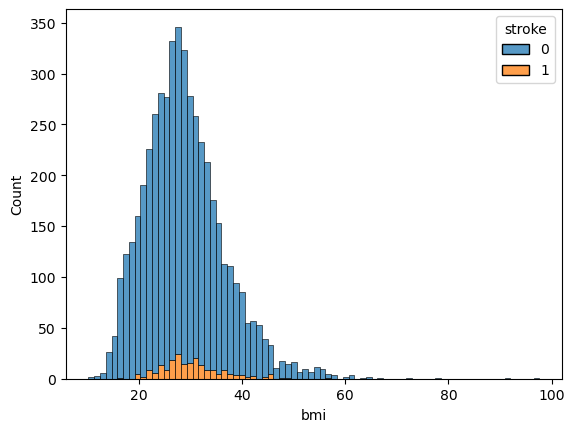

In [40]:
sns.histplot(x="bmi",hue="stroke",multiple="stack",data=df1)

In [41]:
df1.groupby('stroke')['bmi'].mean()

stroke
0    28.824431
1    30.471292
Name: bmi, dtype: float64

In [42]:
df1.groupby('stroke')['bmi'].std()

stroke
0    7.908573
1    6.329452
Name: bmi, dtype: float64

<Axes: xlabel='smoking_status', ylabel='Count'>

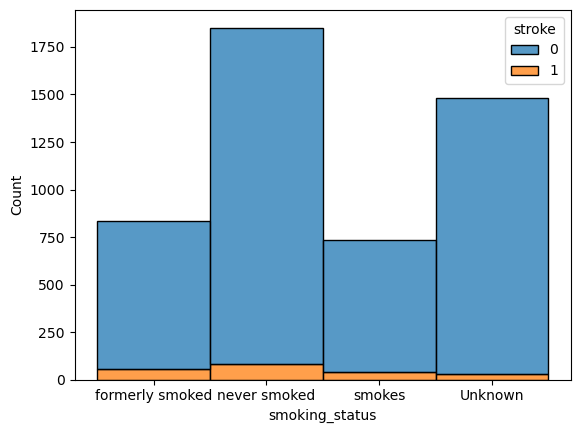

In [43]:
sns.histplot(x="smoking_status",hue="stroke",multiple="stack",data=df1)

In [44]:
df1.smoking_status.value_counts()

smoking_status
never smoked       1852
Unknown            1483
formerly smoked     836
smokes              737
Name: count, dtype: int64

In [45]:
df1.groupby('smoking_status')['stroke'].mean()

smoking_status
Unknown            0.019555
formerly smoked    0.068182
never smoked       0.045356
smokes             0.052917
Name: stroke, dtype: float64

In [46]:
df1.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [47]:
df1

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,
9046,Male,67.0,0,1,Yes,228.69,36.6,formerly smoked,1
31112,Male,80.0,0,1,Yes,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,174.12,24.0,never smoked,1
56669,Male,81.0,0,0,Yes,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...
14180,Female,13.0,0,0,No,103.08,18.6,Unknown,0
44873,Female,81.0,0,0,Yes,125.20,40.0,never smoked,0
19723,Female,35.0,0,0,Yes,82.99,30.6,never smoked,0


In [48]:
df_processed = df1

In [49]:
df_processed

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,
9046,Male,67.0,0,1,Yes,228.69,36.6,formerly smoked,1
31112,Male,80.0,0,1,Yes,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,174.12,24.0,never smoked,1
56669,Male,81.0,0,0,Yes,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...
14180,Female,13.0,0,0,No,103.08,18.6,Unknown,0
44873,Female,81.0,0,0,Yes,125.20,40.0,never smoked,0
19723,Female,35.0,0,0,Yes,82.99,30.6,never smoked,0


In [50]:
df_processed['gender'] = pd.get_dummies(df_processed.gender,drop_first=True,dtype=int)
df_processed

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,
9046,1,67.0,0,1,Yes,228.69,36.6,formerly smoked,1
31112,1,80.0,0,1,Yes,105.92,32.5,never smoked,1
60182,0,49.0,0,0,Yes,171.23,34.4,smokes,1
1665,0,79.0,1,0,Yes,174.12,24.0,never smoked,1
56669,1,81.0,0,0,Yes,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...
14180,0,13.0,0,0,No,103.08,18.6,Unknown,0
44873,0,81.0,0,0,Yes,125.20,40.0,never smoked,0
19723,0,35.0,0,0,Yes,82.99,30.6,never smoked,0


In [51]:
df_processed['ever_married'] = pd.get_dummies(df_processed.ever_married,drop_first=True,dtype=int)
df_processed

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,
9046,1,67.0,0,1,1,228.69,36.6,formerly smoked,1
31112,1,80.0,0,1,1,105.92,32.5,never smoked,1
60182,0,49.0,0,0,1,171.23,34.4,smokes,1
1665,0,79.0,1,0,1,174.12,24.0,never smoked,1
56669,1,81.0,0,0,1,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...
14180,0,13.0,0,0,0,103.08,18.6,Unknown,0
44873,0,81.0,0,0,1,125.20,40.0,never smoked,0
19723,0,35.0,0,0,1,82.99,30.6,never smoked,0


In [52]:
df2 = df_processed

In [53]:
dum1 = pd.get_dummies(df2['smoking_status'],drop_first=True,dtype=int)
dum1

,formerly smoked,never smoked,smokes
id,,,
9046,1,0,0
31112,0,1,0
60182,0,0,1
1665,0,1,0
56669,1,0,0
...,...,...,...
14180,0,0,0
44873,0,1,0
19723,0,1,0


In [54]:
df2 = pd.concat([df2,dum1],axis=1)

In [55]:
df2 = df2.drop('smoking_status',axis=1)

In [56]:
df2

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,formerly smoked,never smoked,smokes
id,,,,,,,,,,,
9046,1,67.0,0,1,1,228.69,36.6,1,1,0,0
31112,1,80.0,0,1,1,105.92,32.5,1,0,1,0
60182,0,49.0,0,0,1,171.23,34.4,1,0,0,1
1665,0,79.0,1,0,1,174.12,24.0,1,0,1,0
56669,1,81.0,0,0,1,186.21,29.0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
14180,0,13.0,0,0,0,103.08,18.6,0,0,0,0
44873,0,81.0,0,0,1,125.20,40.0,0,0,1,0
19723,0,35.0,0,0,1,82.99,30.6,0,0,1,0


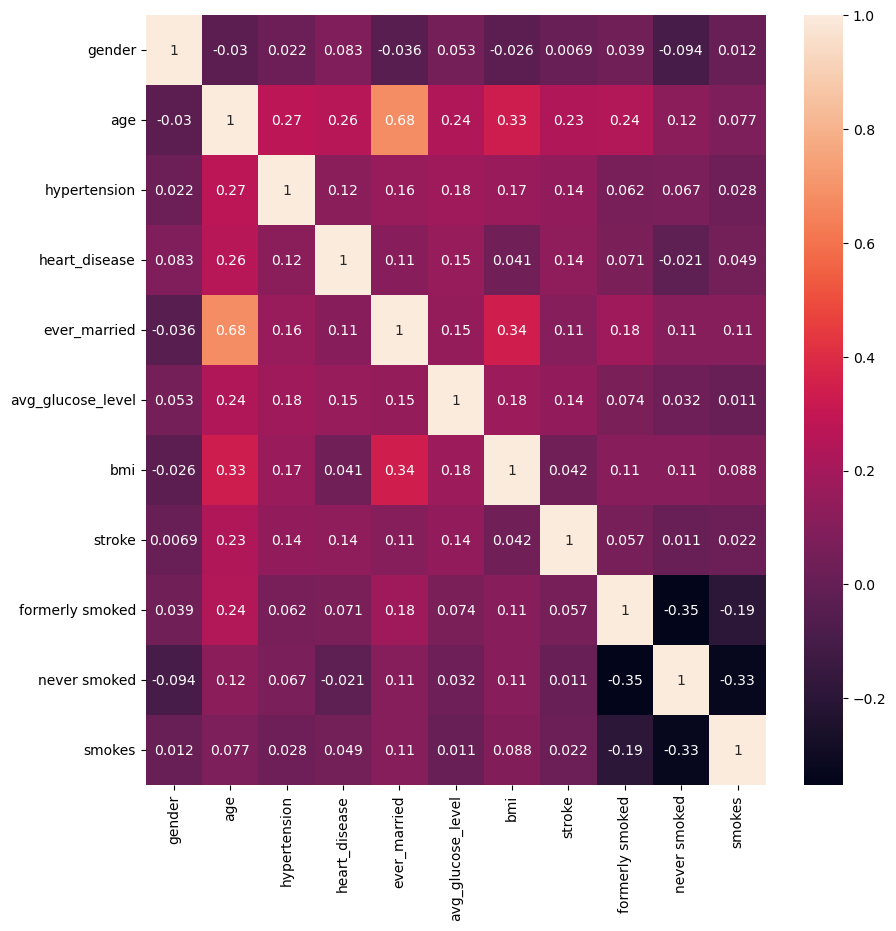

In [57]:
plt.figure(figsize=(10,10))
sns.heatmap(df2.corr(),annot=True)
plt.show()

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
df_train, df_test = train_test_split(df2,test_size=0.2,stratify = df2.stroke)

In [60]:
len(df2)

4908

In [61]:
len(df_train)

3926

In [62]:
len(df_test)

982

In [63]:
df_train

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,formerly smoked,never smoked,smokes
id,,,,,,,,,,,
72474,0,82.0,0,0,1,58.30,20.4,0,0,1,0
12677,0,60.0,0,0,1,99.00,26.1,0,0,1,0
9637,1,26.0,0,0,1,120.31,22.3,0,0,0,1
65632,1,42.0,0,0,1,145.50,31.8,0,1,0,0
22384,0,24.0,0,0,1,97.92,23.1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
954,1,18.0,0,0,0,103.94,23.3,0,0,1,0
68302,0,40.0,0,0,1,65.77,31.2,0,0,1,0
19996,0,7.0,0,0,0,88.60,17.4,0,0,0,0


In [64]:
print(df2.gender.mean())
print(df_train.gender.mean())
print(df_test.gender.mean())

0.4097392013039935
0.4116148751910341
0.40224032586558045


In [65]:
print(df2.stroke.mean())
print(df_train.stroke.mean())
print(df_test.stroke.mean())

0.04258353708231459
0.04253693326541009
0.04276985743380855


In [66]:
df_train.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'avg_glucose_level', 'bmi', 'stroke', 'formerly smoked', 'never smoked',
       'smokes'],
      dtype='object')

In [67]:
X_train = df_train.loc[:,['gender','age','hypertension','heart_disease','ever_married','avg_glucose_level','bmi','formerly smoked','never smoked','never smoked',
       'smokes']].values
y_train = df_train.stroke.values

In [68]:
X_train[:5]

array([[  0.  ,  82.  ,   0.  ,   0.  ,   1.  ,  58.3 ,  20.4 ,   0.  ,
          1.  ,   1.  ,   0.  ],
       [  0.  ,  60.  ,   0.  ,   0.  ,   1.  ,  99.  ,  26.1 ,   0.  ,
          1.  ,   1.  ,   0.  ],
       [  1.  ,  26.  ,   0.  ,   0.  ,   1.  , 120.31,  22.3 ,   0.  ,
          0.  ,   0.  ,   1.  ],
       [  1.  ,  42.  ,   0.  ,   0.  ,   1.  , 145.5 ,  31.8 ,   1.  ,
          0.  ,   0.  ,   0.  ],
       [  0.  ,  24.  ,   0.  ,   0.  ,   1.  ,  97.92,  23.1 ,   0.  ,
          1.  ,   1.  ,   0.  ]])

In [69]:
X_test = df_test.loc[:,['gender','age','hypertension','heart_disease','ever_married','avg_glucose_level','bmi','formerly smoked','never smoked','never smoked',
       'smokes']].values
y_test = df_test.stroke.values

In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
lr_model = LogisticRegression(class_weight="balanced", random_state=0,max_iter=1000)

In [72]:
# lr_model.fit(X=X_train,y=y_train)
lr_model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=0)

In [73]:
y_test_predicted = lr_model.predict(X_test)

In [74]:
y_test_predicted

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,

In [75]:
(y_test_predicted == y_test).sum()/len(y_test)

0.7474541751527495

In [76]:
from sklearn.metrics import confusion_matrix

In [77]:
cf = pd.DataFrame(columns=['y_pred_0','y_pred_1'],index=['y_test_0','y_test_1'])

In [78]:
cf.loc[:,:] = confusion_matrix(y_true=y_test,y_pred=y_test_predicted)

In [79]:
cf

,y_pred_0,y_pred_1
y_test_0,699,241
y_test_1,7,35


In [80]:
y_test_predicted.sum()

276

In [81]:
cf/len(y_test)

,y_pred_0,y_pred_1
y_test_0,0.711813,0.245418
y_test_1,0.007128,0.035642


In [82]:
from sklearn.metrics import recall_score, precision_score

In [83]:
recall_score(y_true=y_test,y_pred=y_test_predicted)

0.8333333333333334

In [84]:
precision_score(y_true=y_test,y_pred=y_test_predicted)

0.12681159420289856

correctly predicted 12% in all predicted 1.

In [85]:
from sklearn.metrics import classification_report

In [86]:
report=classification_report(y_true=y_test,y_pred=y_test_predicted)

In [87]:
print(report)

              precision    recall  f1-score   support

           0       0.99      0.74      0.85       940
           1       0.13      0.83      0.22        42

    accuracy                           0.75       982
   macro avg       0.56      0.79      0.53       982
weighted avg       0.95      0.75      0.82       982



In [88]:
from sklearn.neural_network import MLPClassifier

In [89]:
X_train.shape

(3926, 11)

In [90]:
nn_model = MLPClassifier(hidden_layer_sizes = (20,10),max_iter=1000)

In [91]:
nn_model.fit(X=X_train,y=y_train)

MLPClassifier(hidden_layer_sizes=(20, 10), max_iter=1000)

In [92]:
y_test_predicted_nn = nn_model.predict(X_test)

In [93]:
report_nn = classification_report(y_pred=y_test_predicted_nn,y_true=y_test)

In [94]:
print(report_nn)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       940
           1       0.09      0.05      0.06        42

    accuracy                           0.94       982
   macro avg       0.52      0.51      0.52       982
weighted avg       0.92      0.94      0.93       982



In [95]:
from sklearn.tree import DecisionTreeClassifier

In [96]:
dt_model = DecisionTreeClassifier()

In [97]:
dt_model.fit(X=X_train,y=y_train)

DecisionTreeClassifier()

In [98]:
y_test_predicted_dt = dt_model.predict(X_test)

In [99]:
report_dt = classification_report(y_pred=y_test_predicted_dt,y_true=y_test)

In [100]:
print(report_dt)

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       940
           1       0.10      0.12      0.11        42

    accuracy                           0.91       982
   macro avg       0.53      0.53      0.53       982
weighted avg       0.92      0.91      0.92       982



In [101]:
from sklearn.ensemble import RandomForestClassifier

In [102]:
rf_model = RandomForestClassifier()

In [103]:
rf_model.fit(X=X_train,y=y_train)

RandomForestClassifier()

In [104]:
y_test_predicted_rf = rf_model.predict(X_test)

In [105]:
report_rf = classification_report(y_pred=y_test_predicted_rf,y_true=y_test)

In [106]:
print(report_rf)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       940
           1       0.00      0.00      0.00        42

    accuracy                           0.96       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.92      0.96      0.94       982



In [107]:
print("Report of logistic regression")

print(report)

Report of logistic regression
              precision    recall  f1-score   support

           0       0.99      0.74      0.85       940
           1       0.13      0.83      0.22        42

    accuracy                           0.75       982
   macro avg       0.56      0.79      0.53       982
weighted avg       0.95      0.75      0.82       982



In [108]:
print("Report of MLP model")
print(report_nn)

Report of MLP model
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       940
           1       0.09      0.05      0.06        42

    accuracy                           0.94       982
   macro avg       0.52      0.51      0.52       982
weighted avg       0.92      0.94      0.93       982



In [109]:
print("Report of Decision Tree classifier model")
print(report_dt)

Report of Decision Tree classifier model
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       940
           1       0.10      0.12      0.11        42

    accuracy                           0.91       982
   macro avg       0.53      0.53      0.53       982
weighted avg       0.92      0.91      0.92       982



In [110]:
print("Report of Random Forest model")
print(report_rf)

Report of Random Forest model
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       940
           1       0.00      0.00      0.00        42

    accuracy                           0.96       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.92      0.96      0.94       982

